In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
filename = "Iris.csv"
dataset = read_csv(filename,  usecols = [i for i in range(1,6)]) #ID sütununu ekrana yazdırmamak için usecols komutu ile verisetine alınacak sütunları seçtim.

In [3]:
print(dataset.shape) #150 gözlem, 5 değişken

(150, 5)


In [4]:
print(dataset.head(20))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [5]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [6]:
print(dataset.groupby("Species").size()) #Veriseti sınıflandırma verisi olduğu için sınıfların dağılımı önemli.

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF9C72EA88>,
      dtype=object)

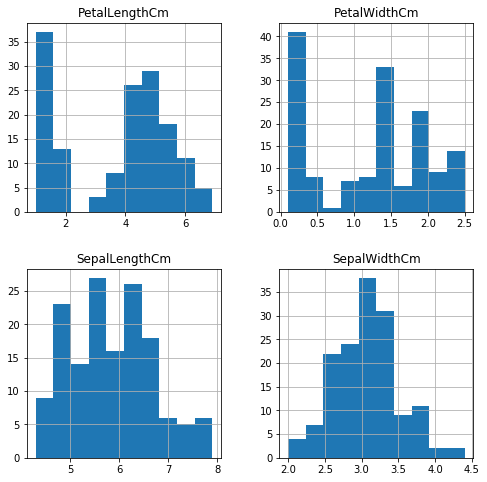

In [7]:
dataset.hist(figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF9CB9E148>,
      dtype=object)

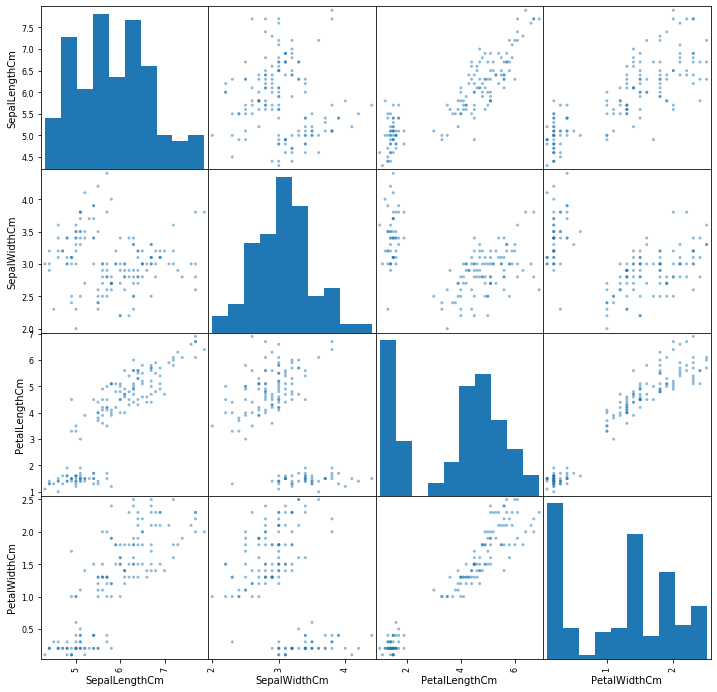

In [8]:
scatter_matrix(dataset, figsize = (12, 12))

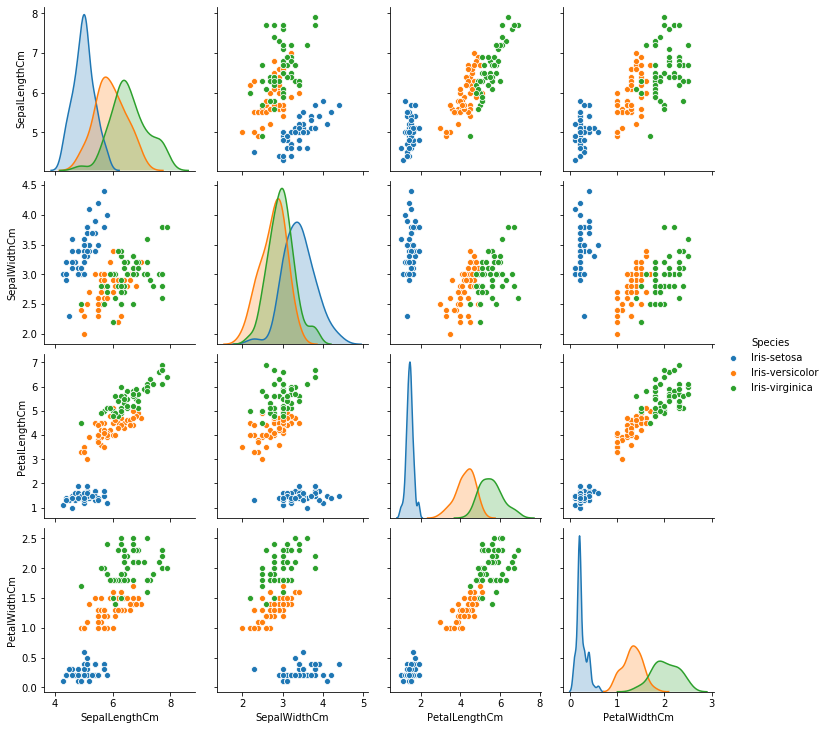

In [9]:
import seaborn as sns
sns.pairplot(dataset, hue = "Species")

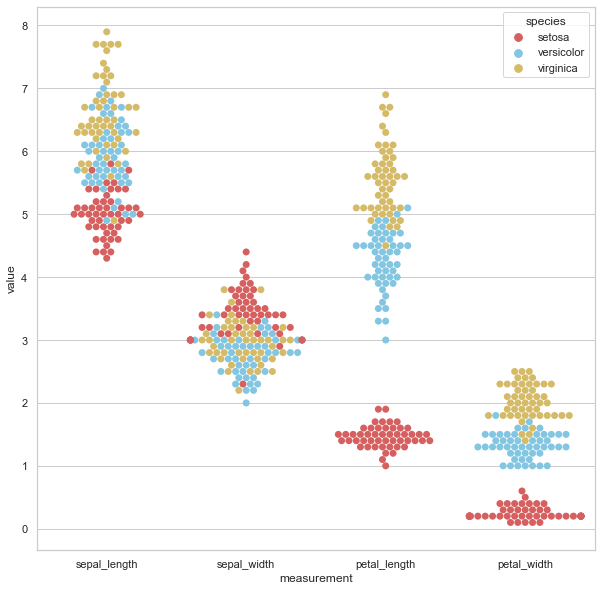

In [10]:
import pandas as pd
import seaborn as sns
pyplot.figure(figsize = (10, 10))
sns.set(style = "whitegrid", palette = "muted")

iris = sns.load_dataset("iris")
iris = pd.melt(iris, "species", var_name = "measurement")

sns.swarmplot(x = "measurement", y = "value", hue = "species", palette = ["r", "c", "y"], data = iris, size = 7)

In [11]:
array = dataset.values
X = array [:, 0:4] #Girdi -->Bu satır ile Bütün satırları ve ilk 5 sütunu almasını sağladık(yani bütün veri seti.)
Y = array [:, 4] #Çıktı --> Bu satır ile bütün satırları ve sadece 5. sütunu yani çıktı (Species) sütununu aldık.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 77)

In [12]:
models = []
models.append(("LR", LogisticRegression(solver = "lbfgs", max_iter = 5000)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

names = []
sonuc = []
isim = []
for isim, model in models:        #KFold'u programın başında sklearn.model_selection dan import etmiştik
    kfold = KFold(n_splits = 10) #Döngü her çalışmasında 10lu çapraz doğrulama yapacak
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold)
    sonuc.append(cv_results)
    names.append(isim)
    msg = "%s: %f (%f)" % (isim, cv_results.mean(), cv_results.std()) #Modelin ismi, çapraz doğrulama sonuçlarının ortalaması, standart sapması
    print(msg)

LR: 0.966667 (0.055277)
KNN: 0.975000 (0.038188)
CART: 0.950000 (0.066667)
NB: 0.975000 (0.038188)
SVM: 0.950000 (0.084984)


In [13]:
#Eğitim sürecini tamamladık. Sırada test verisini kullanarak modellerin performans ölçümünü yapıcaz.

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("Test Verisi İçin Doğruluk Oranı: ", accuracy_score(Y_test, predictions), "\n")
print("Hata matrisi: \n", confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Test Verisi İçin Doğruluk Oranı:  0.9333333333333333 

Hata matrisi: 
 [[ 9  0  0]
 [ 0  7  1]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [15]:
# ÖRNEK UYGULAMA 2

In [16]:
import pandas as pd
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR #Support Vector Regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos["PRICE"] = boston.target

In [18]:
print(bos.shape) #506 gözlem, 14 değişken

(506, 14)


In [19]:
print(bos.dtypes) #Veri tipleri float yani Sürekli(sayısal) değerler

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


In [20]:
set_option("precision", 2)
print(bos.describe()) #Bütün değişkenlerde 506 değer var yani kayıp veri (missing value) yok.

           CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS  \
count  5.06e+02  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean   3.61e+00   11.36   11.14    0.07    0.55    6.28   68.57    3.80   
std    8.60e+00   23.32    6.86    0.25    0.12    0.70   28.15    2.11   
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13   
25%    8.20e-02    0.00    5.19    0.00    0.45    5.89   45.02    2.10   
50%    2.57e-01    0.00    9.69    0.00    0.54    6.21   77.50    3.21   
75%    3.68e+00   12.50   18.10    0.00    0.62    6.62   94.07    5.19   
max    8.90e+01  100.00   27.74    1.00    0.87    8.78  100.00   12.13   

          RAD     TAX  PTRATIO       B   LSTAT   PRICE  
count  506.00  506.00   506.00  506.00  506.00  506.00  
mean     9.55  408.24    18.46  356.67   12.65   22.53  
std      8.71  168.54     2.16   91.29    7.14    9.20  
min      1.00  187.00    12.60    0.32    1.73    5.00  
25%      4.00  279.00    17.40  375.38 

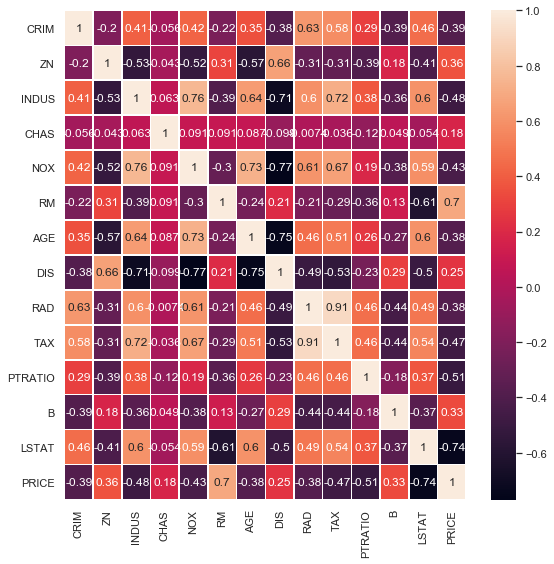

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

j = bos.corr()
f , ax = plt.subplots(figsize = (9, 9))
sns.heatmap(j, annot = True, linewidths = .5, ax = ax)

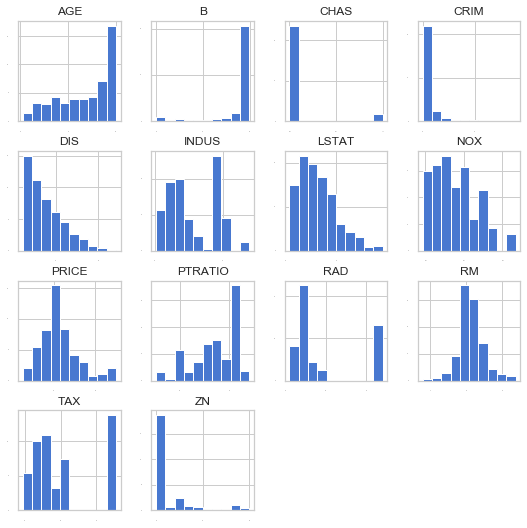

In [22]:
bos.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1, figsize = (9, 9))
pyplot.show(bos.hist)
#pyplot.show() Bu şekilde de çağrılabilir.

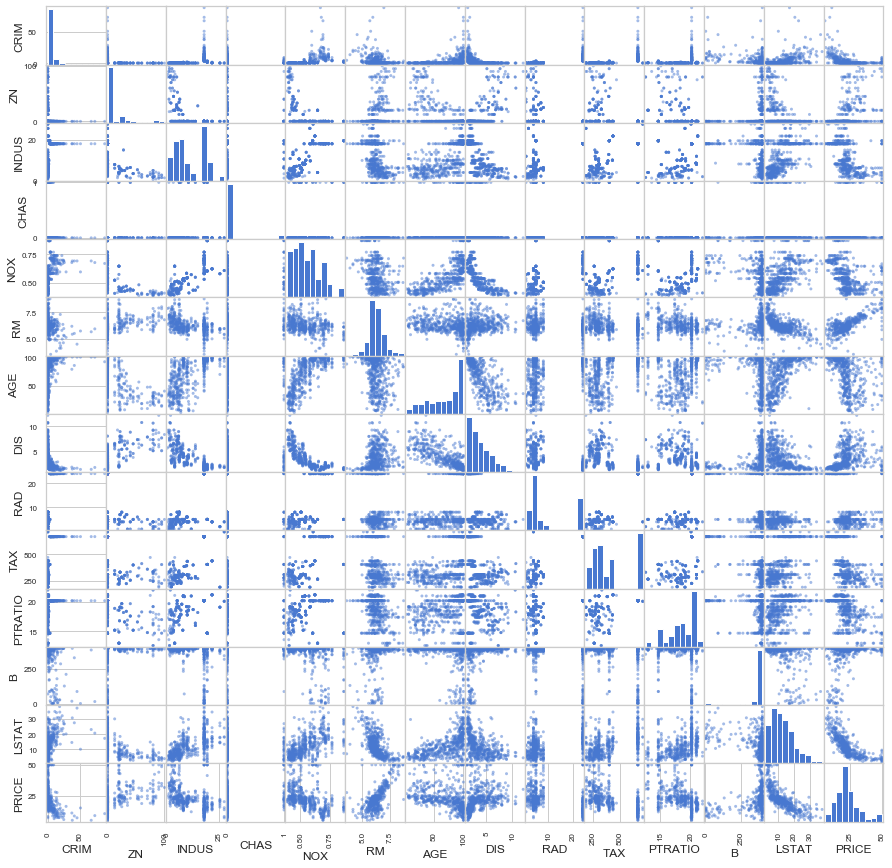

In [23]:
scatter_matrix(bos, figsize = (15, 15))
pyplot.show()

In [24]:
array = bos.values
X = array[:, 0:13] #Girdi
Y = array[:, 13] #Çıktı

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 55)

In [25]:
models = []
models.append(("LR", LinearRegression())) #Verinin normalize edilmesi gerekiyor
models.append(("LASSO", Lasso())) #Verinin normalize edilmesi gerekiyor
models.append(("KNN", KNeighborsRegressor()))# Verinin normalize edilmesi gerekiyor
models.append(("CART", DecisionTreeRegressor()))

In [26]:
names = []
sonuc = []
isim = []
for isim, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold)
    sonuc.append(cv_results)
    names.append(isim)
    msg = "%s: %f (%f)" % (isim, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.700065 (0.070992)
LASSO: 0.649169 (0.057430)
KNN: 0.520416 (0.114861)
CART: 0.788773 (0.082117)


In [27]:
# Birden çok öğrenme sürecini birleştirmek için Pipeline kullanılır.
#3 farklı öğrenme sürecini birleştirerek veriyi normalize edip performans ölçümü yapıcaz.
pipelines = []
pipelines.append(("Scaled_LR", Pipeline([("Scaler", StandardScaler()), ("LR", LinearRegression())])))
pipelines.append(("Scaled_LASSO", Pipeline([("Scaler", StandardScaler()), ("LASSO", Lasso())])))
pipelines.append(("Scaled_KNN", Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsRegressor())])))

names = []
sonuc = []
isim = []
for isim,model in pipelines:
    kfold = KFold(n_splits = 10)
    cv_results1 = cross_val_score(model, X_train, Y_train, cv = kfold)
    sonuc.append(cv_results1)
    names.append(isim)
    msg = "%s: %f (%f)" % (isim, cv_results1.mean(), cv_results1.std())
    print(msg)

Scaled_LR: 0.700065 (0.070992)
Scaled_LASSO: 0.643127 (0.065760)
Scaled_KNN: 0.746064 (0.065474)


In [29]:
# Performansı (doğruluk oranını) yükseltebilmek için parametre optimizasyonu yapıcaz.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
param_grid = dict(n_neighbors = k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [36]:
print("En iyi: %f %s ile " % (grid_result.best_score_, grid_result.best_params_),  "\n") #Grid Search sonucunda bulunan En iyi parametre
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

En iyi: 0.760135 {'n_neighbors': 3} ile  

0.692033 (0.086697): {'n_neighbors': 1}
0.760135 (0.066614): {'n_neighbors': 3}
0.754960 (0.068736): {'n_neighbors': 5}
0.740929 (0.102114): {'n_neighbors': 7}
0.737002 (0.099386): {'n_neighbors': 9}
0.733088 (0.097712): {'n_neighbors': 11}
0.727940 (0.099779): {'n_neighbors': 13}
0.716288 (0.106874): {'n_neighbors': 15}
0.701748 (0.104260): {'n_neighbors': 17}
0.693299 (0.108676): {'n_neighbors': 19}
0.684760 (0.103165): {'n_neighbors': 21}


In [37]:
#Farklı modeller kullanarak veriyi analiz etmeye devam edelim.
models = []
models.append(("GBM", GradientBoostingRegressor(n_estimators = 150)))
models.append(("RF", RandomForestRegressor(n_estimators = 150)))
models.append(("ET", ExtraTreesRegressor(n_estimators = 150)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBM: 0.905401 (0.037124)
RF: 0.885022 (0.041068)
ET: 0.892553 (0.035257)


In [38]:
#En iyi sonuç GradientBoostingRegressor algoritmasından alındı. Bu sonucu daha da yükseltmeye çalışalım.(parametre opt. yaparak)
param_grid = dict(n_estimators = numpy.array([50, 100, 150, 200, 250, 300, 350, 400]))
model = GradientBoostingRegressor()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("En iyi: %f %s ile " % (grid_result.best_score_, grid_result.best_params_))

En iyi: 0.905540 {'n_estimators': 150} ile 


In [39]:
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

0.900139 (0.033755): {'n_estimators': 50}
0.905431 (0.035214): {'n_estimators': 100}
0.905540 (0.037110): {'n_estimators': 150}
0.903374 (0.037585): {'n_estimators': 200}
0.903064 (0.036827): {'n_estimators': 250}
0.902372 (0.035541): {'n_estimators': 300}
0.904552 (0.035252): {'n_estimators': 350}
0.904266 (0.036152): {'n_estimators': 400}


In [41]:
#model = GradientBoostingRegressor(n_estimators = 150)
parametre = grid_result.best_params_
model = GradientBoostingRegressor(**parametre)
model.fit(X_train, Y_train)

tahmin_train = model.predict(X_train)
tahmin_test = model.predict(X_test)
print("R-Kare(test): %.4f\n" % r2_score(Y_test, tahmin_test))
print("R-Kare(eğitim): %.4f\n" % r2_score(Y_train, tahmin_train))

R-Kare(test): 0.8527

R-Kare(eğitim): 0.9865

